# Task_4
# Register ID: SIRSS2325
# Name: Aniket Dhane

 Hi, in this notebook I tried to explore the data using some visualization and analysis techniques. The dataset 'Fish Market' is taken from kaggle.com. Let's start with importing the basic liabraries like numpy, pandas, seaborn, matplotlib, etc.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
print("All libraries are imported successfully...")

All libraries are imported successfully...


In [4]:
#Now, import the dataset from local drive
df = pd.read_csv("Documents/REGex Software Training cum Internship/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


There are 159 observations and 7 features including the target column i.e. Species.
We will now check for the central tendency i.e. mean, median, mode.

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


From the above information we can see that all data types are float excpet column species is object. We can do both regression(for weight column) as well as classification(species of fish). For Now we have to explore EDA and visualization of the data. 

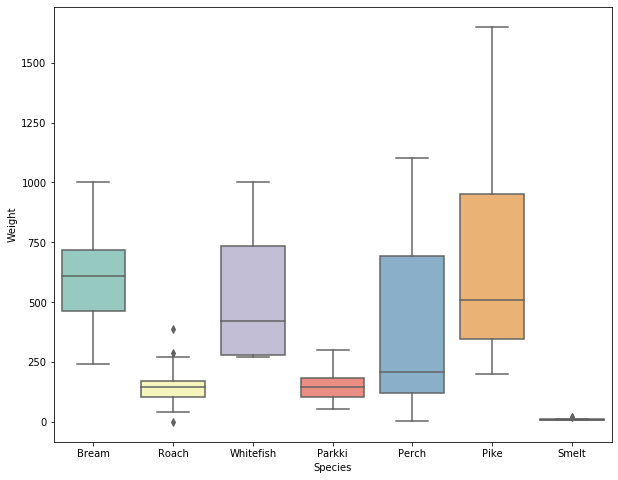

In [9]:
#outleier w.r.t. weight as target column
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Species", y="Weight",data=df, palette="Set3")

In [17]:
# Now we have to convert target columns species into categorical as it has object datatype.
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["Species"]= lbe.fit_transform(df["Species"])


In [18]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe1f2c44d0>,
      dtype=object)

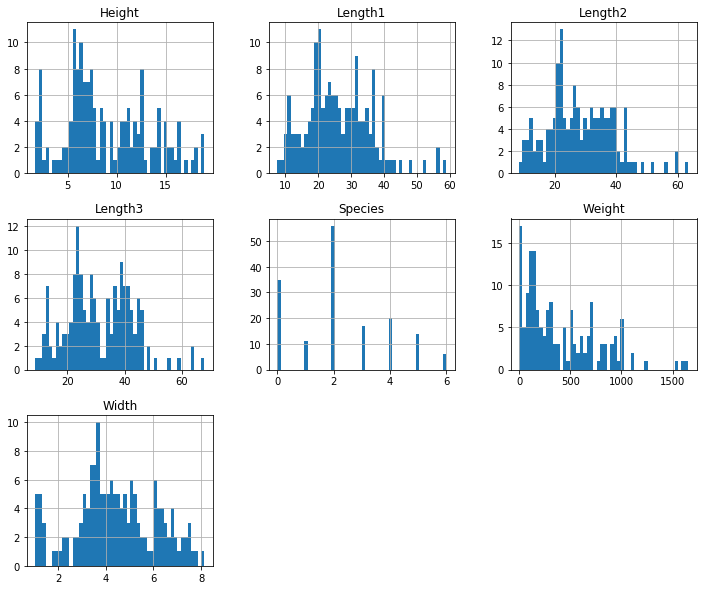

In [20]:
df.hist(figsize=(12, 10), bins=50)

In [21]:
#Check for the null values in the dataset
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Cool! There is no null value in the dataset. We have to find the corrrelation between columns as

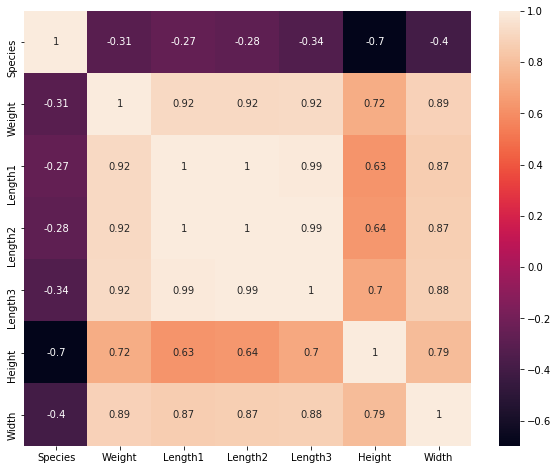

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

Now, we have to remove the outliers from the dataset. There are several methods to detect and remove outliers like boxplot, scatterplot, Z-Score, IQR method. Out of which we are going ot use Z-score method. The *Z-score* is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.(Wikipedia Definition).

In [24]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.33273018 0.43807217 0.30578858 ... 0.10602023 0.59657867 0.23652895]
 [1.33273018 0.30356218 0.22550724 ... 0.00233668 0.82126055 0.06657895]
 [1.33273018 0.16344761 0.23554241 ... 0.01097698 0.79734129 0.16579317]
 ...
 [1.6103823  1.08203874 1.41969211 ... 1.50574813 1.56668655 1.88140219]
 [1.6103823  1.06102155 1.30930527 ... 1.38478399 1.42724336 1.39856804]
 [1.6103823  1.0604611  1.24909427 ... 1.29838103 1.41334117 1.51043989]]


We got the Z-score for the features. Now we apply the maximun threshold to identify outliers.

In [25]:
thrrshold=3
print(np.where(z > 3))

(array([142, 143, 144, 144, 144, 144]), array([1, 1, 1, 2, 3, 4]))


In [26]:
df_1 = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_1.shape)

(159, 7)
(156, 7)


The dataset is ready for the training and testing split.

In [27]:
#Thank you...